<a href="https://colab.research.google.com/github/Om2707/Customer-segmentation-using-K-mean/blob/main/Customer_segmentation_using_K_mean_om_praveen_tagalpallewar(Age_Income).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Customer Segmentation/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# we will apply the K-mean clustering between Age and Annual income

In [ ]:
# since here is all , just because unlabelled data
# i need to convert data in numpy matrix
x = df[['Age',	'Annual Income (k$)']].values
x

array([[ 19,  15],
       [ 21,  15],
       [ 20,  16],
       [ 23,  16],
       [ 31,  17],
       [ 22,  17],
       [ 35,  18],
       [ 23,  18],
       [ 64,  19],
       [ 30,  19],
       [ 67,  19],
       [ 35,  19],
       [ 58,  20],
       [ 24,  20],
       [ 37,  20],
       [ 22,  20],
       [ 35,  21],
       [ 20,  21],
       [ 52,  23],
       [ 35,  23],
       [ 35,  24],
       [ 25,  24],
       [ 46,  25],
       [ 31,  25],
       [ 54,  28],
       [ 29,  28],
       [ 45,  28],
       [ 35,  28],
       [ 40,  29],
       [ 23,  29],
       [ 60,  30],
       [ 21,  30],
       [ 53,  33],
       [ 18,  33],
       [ 49,  33],
       [ 21,  33],
       [ 42,  34],
       [ 30,  34],
       [ 36,  37],
       [ 20,  37],
       [ 65,  38],
       [ 24,  38],
       [ 48,  39],
       [ 31,  39],
       [ 49,  39],
       [ 24,  39],
       [ 50,  40],
       [ 27,  40],
       [ 29,  40],
       [ 31,  40],
       [ 49,  42],
       [ 33,  42],
       [ 31,

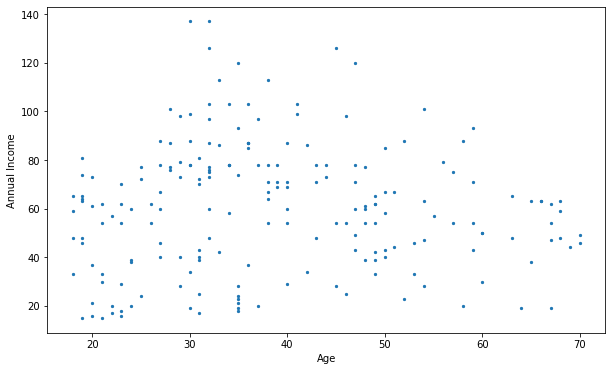

In [ ]:
# plot the data points || original shape
plt.figure(figsize=(10,6))
plt.scatter(x[:,0] ,x[:,1],s=5) # x[:,0] = age column , x[:,1]= annual income
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [ ]:
# apply algorithm
# load algorithm
from sklearn.cluster import KMeans

In [ ]:
model = KMeans()
model.fit(x) # only features data

KMeans()

In [ ]:
# how many cluster create by model by default
model.n_clusters

8

In [ ]:
# wcss(error) || technical term inertia
model.inertia_

18808.749269005843

In [ ]:
round(model.inertia_)

18809

In [ ]:
# before getting the prediction ( we got cluster id)
# we need to performe optimal number of cluster
# Elbow method
err=[]
for i in range(1,11):
  model1 = KMeans(n_clusters=i)
  model1.fit(x) # only features data
  print('Cluster number ->', i , '  || Error ->', round(model1.inertia_))
  # store the error in list err
  err.append(round(model1.inertia_))

Cluster number -> 1   || Error -> 176109
Cluster number -> 2   || Error -> 87122
Cluster number -> 3   || Error -> 59487
Cluster number -> 4   || Error -> 39530
Cluster number -> 5   || Error -> 31726
Cluster number -> 6   || Error -> 25416
Cluster number -> 7   || Error -> 22091
Cluster number -> 8   || Error -> 18806
Cluster number -> 9   || Error -> 16148
Cluster number -> 10   || Error -> 13707


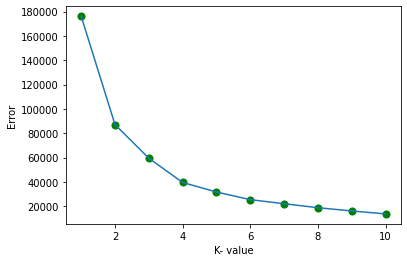

In [ ]:
# Plot the elbow
plt.plot(range(1,11), err)
plt.scatter(range(1,11), err, marker='o', c='green', s=50)
plt.xlabel('K- value')
plt.ylabel('Error')
plt.show()

In [ ]:
# we decided k= 5 will good for us
# we are building model with k= 5
model2 = KMeans(n_clusters=5)
model2.fit(x)
# get pridiction
y_kmean = model2.predict(x)  #  y_kmean = pred

In [ ]:
y_kmean

array([0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [ ]:
# centroid coordinate
model2.cluster_centers_

array([[ 29.53658537,  27.24390244],
       [ 25.06451613,  59.48387097],
       [ 38.25862069,  78.15517241],
       [ 56.62      ,  48.48      ],
       [ 36.6       , 109.7       ]])

In [ ]:
# challenge , How to print data point which in clusetr 0 ,1,2,3,4

In [ ]:
# datapoints which goes to cluster id =0 || cluster 1
temp_age = x[y_kmean==0,0] # feature[cluster id , feature 1] here feature is age

In [ ]:
temp_age

array([19, 21, 20, 23, 31, 22, 35, 23, 30, 35, 24, 37, 22, 35, 20, 52, 35,
       35, 25, 46, 31, 29, 45, 35, 40, 23, 21, 18, 21, 42, 30, 36, 20, 24,
       31, 24, 27, 29, 31, 33, 31])

In [ ]:
temp_income = x[y_kmean==0,1] # feature[cluster id , feature 2] here feature is income

In [ ]:
temp_income

array([15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 20, 21, 21, 23, 23,
       24, 24, 25, 25, 28, 28, 28, 29, 29, 30, 33, 33, 34, 34, 37, 37, 38,
       39, 39, 40, 40, 40, 42, 43])

In [ ]:
# tabular representation
cluster_1 = pd.DataFrame({'Age' :temp_age , 'Income' : temp_income })
cluster_1

,Age,Income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
5,22,17
6,35,18
7,23,18
8,30,19
9,35,19


In [ ]:
# tabular representation
cluster_2 = pd.DataFrame({'Age' :x[y_kmean==1,0] , 'Income' : x[y_kmean==1,1] })
cluster_2

,Age,Income
0,27,46
1,19,46
2,18,48
3,19,48
4,32,48
5,26,54
6,40,54
7,23,54
8,38,54
9,21,54


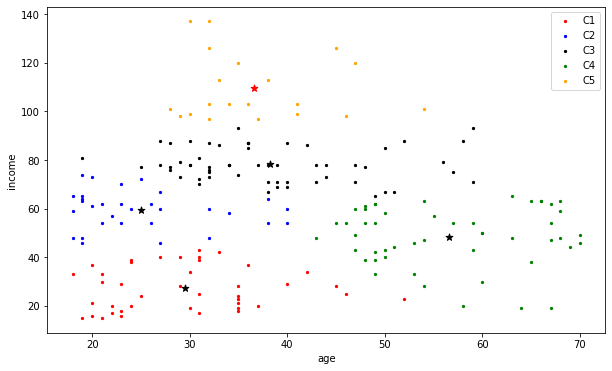

In [ ]:
# cluster vis
plt.figure(figsize=(10,6))
# =============putting cluster 1
plt.scatter(x[y_kmean==0,0],x[y_kmean==0,1] , s = 5 , c ='red', label='C1')
# put centroid
plt.scatter(25.06451613,  59.48387097 , s = 50 , c ='black', marker='*')
# ==============putting cluster 2
plt.scatter(x[y_kmean==1,0],x[y_kmean==1,1] , s = 5 , c ='blue', label='C2')
# put centroid
plt.scatter( 29.53658537,  27.24390244, s = 50 , c ='black', marker='*')
# ==============putting cluster 3
plt.scatter(x[y_kmean==2,0],x[y_kmean==2,1] , s = 5 , c ='black', label='C3')
# put centroid
plt.scatter( 36.6       , 109.7 , s = 50 , c ='red', marker='*')
# ==============putting cluster 4
plt.scatter(x[y_kmean==3,0],x[y_kmean==3,1] , s = 5 , c ='green', label='C4')
# put centroid
plt.scatter(56.62      ,  48.48 , s = 50 , c ='black', marker='*')
# ==============putting cluster 5
plt.scatter(x[y_kmean==4,0],x[y_kmean==4,1] , s = 5 , c ='orange', label='C5')
# put centroid
plt.scatter(38.25862069,  78.15517241 , s = 50 , c ='black', marker='*')

plt.xlabel('age')
plt.ylabel('income')
plt.legend()
plt.show()

In [ ]:
# conclusion : in Cluster 1 we found some persons whose age between 15 to 59
# thet have annual income between 60 K$ to 90 K$


# conclusion : in Cluster 2 we found some persons whose age between 10 to 55
# thet have annual income between 10 K$ to 40 K$

# conclusion : in Cluster 3 we found some persons whose age between 28 to 55
# thet have annual income between 95 K$ to 135 K$

# conclusion : in Cluster 4 we found some persons whose age between 43 to 70
# thet have annual income between 45 K$ to 75 K$

# conclusion : in Cluster 5 we found some persons whose age between 10 to 40
# thet have annual income between 10 K$ to 40 K$

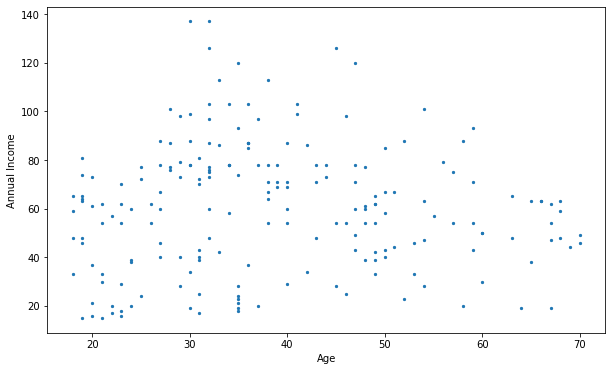

In [ ]:
# original shape
plt.figure(figsize=(10,6))
plt.scatter(x[:,0] ,x[:,1],s=5) # x[:,0] = age column , x[:,1]= annual income
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()